In [3]:
import pandas as pd
import numpy as np
import datetime
import os
from sklearn import preprocessing

In [4]:
def dateparse (time_in_secs):    
    return datetime.datetime.fromtimestamp(float(time_in_secs))

In [6]:
os.chdir('..')
os.chdir('btc data')
data = pd.read_csv('bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2017-10-20.csv', parse_dates=True, date_parser=dateparse, index_col=[0])

In [7]:
data['Open'].isnull().sum()

0

In [8]:
data['Volume_(BTC)'].fillna(value=0, inplace=True)
data['Volume_(Currency)'].fillna(value=0, inplace=True)
data['Weighted_Price'].fillna(value=0, inplace=True)
data['Open'].fillna(method='ffill', inplace=True)
data['High'].fillna(method='ffill', inplace=True)
data['Low'].fillna(method='ffill', inplace=True)
data['Close'].fillna(method='ffill', inplace=True)

In [9]:
df = (data - data.mean())/ data.std() 

In [10]:
# Make train set the first 95% of the total dataset
train = df.iloc[:-2*int(np.floor(len(df)*0.025))]
# make CV set 2.5% of total dataset and after the train set
cv = df.iloc[-2*int(np.floor(len(df)*0.025)):-int(np.floor(len(df)*0.025))]
# Make test set 2.5% of total dataset and at the very end
test = df.iloc[-int(np.floor(len(df)*0.025)):]

In [11]:
# Here is a stupid way to try predicting the price using LR
trainX = train.loc[:, df.columns !='Weighted_Price']
trainY = train['Weighted_Price']
testcvX = cv.loc[:, df.columns !='Weighted_Price']
testcvY = cv['Weighted_Price']

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(trainX,trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
np.mean((model.predict(trainX)- trainY) ** 2)

2.330708427965551e-07

In [14]:
# MSE
np.mean((model.predict(testcvX)- testcvY) ** 2)

5.046371753624139e-06

In [15]:
prediction = model.predict(testcvX)
prediction = pd.Series(data=prediction, index=testcvY.index)
print(len(prediction))

76146


In [16]:
import matplotlib.pyplot as plt

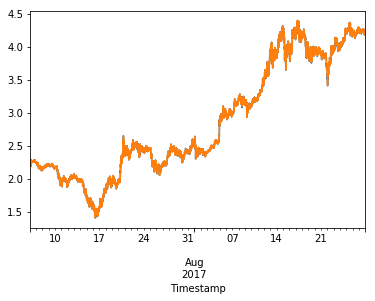

In [17]:
# fig, ax = plt.subplots()
ax = testcvY.plot()
prediction.plot(ax=ax)
plt.show()


In [18]:
pd.Series(data=prediction, index=testcvY.index, name='Prediction')

Timestamp
2017-07-06 01:49:00    2.260979
2017-07-06 01:50:00    2.261183
2017-07-06 01:51:00    2.260429
2017-07-06 01:52:00    2.261161
2017-07-06 01:53:00    2.260663
2017-07-06 01:54:00    2.259550
2017-07-06 01:55:00    2.261354
2017-07-06 01:56:00    2.260520
2017-07-06 01:57:00    2.261587
2017-07-06 01:58:00    2.258410
2017-07-06 01:59:00    2.259391
2017-07-06 02:00:00    2.259440
2017-07-06 02:01:00    2.260007
2017-07-06 02:02:00    2.260723
2017-07-06 02:03:00    2.256899
2017-07-06 02:04:00    2.257042
2017-07-06 02:05:00    2.259413
2017-07-06 02:06:00    2.259369
2017-07-06 02:07:00    2.259865
2017-07-06 02:08:00    2.261598
2017-07-06 02:09:00    2.263225
2017-07-06 02:10:00    2.262274
2017-07-06 02:11:00    2.262274
2017-07-06 02:12:00    2.262623
2017-07-06 02:13:00    2.263958
2017-07-06 02:14:00    2.263958
2017-07-06 02:15:00    2.262921
2017-07-06 02:16:00    2.260631
2017-07-06 02:17:00    2.262942
2017-07-06 02:18:00    2.264618
                         ...  

In [19]:
model.score(testcvX,testcvY)

0.99999306780980846

In [20]:
model.coef_

array([  7.78233887e-02,   4.29077530e-01,   4.14347327e-01,
         7.87760091e-02,   6.60114474e-06,  -7.49487104e-05])

In [21]:
model.intercept_

-3.7868442692712279e-07

In [24]:
df.sub(df.shift(1)).dropna()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 02:53:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-12-31 02:54:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-12-31 02:55:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-12-31 02:56:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-12-31 02:57:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-12-31 02:58:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-12-31 02:59:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-12-31 03:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-12-31 03:01:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 02:52:00,-0.662362,-0.662304,-0.662471,-0.662375,-0.293311,-0.221694,-0.662385
2011-12-31 02:53:00,-0.662362,-0.662304,-0.662471,-0.662375,-0.293311,-0.221694,-0.662385
2011-12-31 02:54:00,-0.662362,-0.662304,-0.662471,-0.662375,-0.293311,-0.221694,-0.662385
2011-12-31 02:55:00,-0.662362,-0.662304,-0.662471,-0.662375,-0.293311,-0.221694,-0.662385
2011-12-31 02:56:00,-0.662362,-0.662304,-0.662471,-0.662375,-0.293311,-0.221694,-0.662385


In [26]:
def pap(data,shifted=1):
    """
    Predict that a value in the past is going to happen next
    :param data: df
    :param shifted: int, how much to shift by
    :return: shifted and subtracted data
    """
    data_pap = data.shift(shifted).dropna()
    
    return data_pap

In [27]:
pap_train_prediction = pap(trainY,10)
pap_test_prediction = pap(testcvY,10)

pap_train_mse = np.mean((pap_train_prediction - trainY) ** 2)
pap_test_mse = np.mean((pap_test_prediction - testcvY) ** 2)

print('pap_train_mse= '+str(pap_train_mse))
print('pap_test_mse= '+str(pap_test_mse))


pap_train_mse= 1.1767251123318513e-05
pap_test_mse= 0.0002606117550038191


In [28]:
df.Weighted_Price.iloc[1:3]

Timestamp
2011-12-31 02:53:00   -0.662385
2011-12-31 02:54:00   -0.662385
Name: Weighted_Price, dtype: float64

In [43]:
-2*int(np.floor(len(df)*0.025))-2

-152294

In [37]:
cv.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2017-07-06 01:49:00,2.260257,2.259268,2.262798,2.261453,-0.055181,0.725096,2.261135
2017-07-06 01:50:00,2.261389,2.259393,2.262798,2.261453,-0.279405,-0.121919,2.261622
2017-07-06 01:51:00,2.260257,2.258137,2.262798,2.260321,-0.142872,0.393702,2.260502
2017-07-06 01:52:00,2.261514,2.259630,2.262798,2.260321,-0.118415,0.486257,2.261272
2017-07-06 01:53:00,2.260257,2.258521,2.262798,2.260706,-0.281668,-0.130497,2.260760


In [48]:
df.iloc[-2*int(np.floor(len(df)*0.025)):-2*int(np.floor(len(df)*0.025))+2]

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2017-07-06 01:49:00,2.260257,2.259268,2.262798,2.261453,-0.055181,0.725096,2.261135
2017-07-06 01:50:00,2.261389,2.259393,2.262798,2.261453,-0.279405,-0.121919,2.261622


In [66]:
train.iloc[:-1, train.columns=='Weighted_Price'].head()

,Weighted_Price
Timestamp,
2011-12-31 02:52:00,-0.662385
2011-12-31 02:53:00,-0.662385
2011-12-31 02:54:00,-0.662385
2011-12-31 02:55:00,-0.662385
2011-12-31 02:56:00,-0.662385


In [74]:
df['2012-01-13 09:05:00']

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2012-01-13 09:05:00,-0.659123,-0.658954,-0.659229,-0.659023,-0.228875,-0.220951,-0.659068
